In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#------DATA MANAGEMENT------
import pandas as pd 
import numpy as np 
#------PREPROCESSING------
import networkx as nx
from tqdm import tqdm
import string
import nltk
import ast
#------VISUALIZATION------
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#------COMMUNITY------
from networkx.algorithms import community
#------MISC------
import time, datetime
from datetime import datetime, timedelta
import re
import functools
import itertools
from collections import Counter
path = "drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/GRAPH_IMAGES/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ANALISI RETE

In [2]:
relazioni = pd.read_csv('/content/drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/tweet_csv/relazioni.csv')
relazioni = relazioni.drop(columns="Unnamed: 0")
relazioni.head()

,X,user_screen_name,retweet_screen_name,month,day
0,3,MarcoYera,MarcoYera,Jan,6
1,4,ValerioManisi,ValerioManisi,Jan,4
2,7,arghail2,arghail2,Jan,2
3,8,WomanWithPen,anubi_matt,Jan,3
4,9,sergimagugliani,Sydwerehere,Jan,2


### Evoluzione rete

In [3]:
evoluzione = pd.read_csv('/content/drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/rete/evoluzione.csv') #dataset ottenuto da file info_rete.R
evoluzione.drop(columns='Unnamed: 0',inplace=True)
evoluzione.rename(columns={'complete': 'data'},inplace=True)
evoluzione.head()

,month,day,mese,data,num_vertici,num_archi
0,Dec,27,dicembre,2019-12-27,219,202
1,Dec,28,dicembre,2019-12-28,955,986
2,Dec,29,dicembre,2019-12-29,339,307
3,Dec,30,dicembre,2019-12-30,294,282
4,Dec,31,dicembre,2019-12-31,415,402


#### Linechart numero vertici

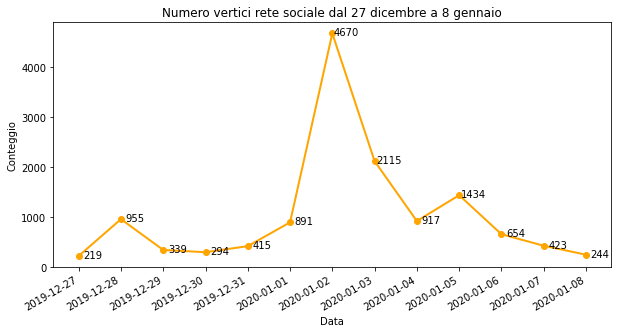

In [4]:
fig =plt.figure(figsize=(10,5))
plt.plot(evoluzione['data'],evoluzione['num_vertici'],color='orange',marker='o',linewidth=2)
plt.title('Numero vertici rete sociale dal 27 dicembre a 8 gennaio')
plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.gcf().autofmt_xdate()


for i in range(0,len(evoluzione)):

    plt.annotate(evoluzione.iloc[i]['num_vertici'], # this is the text
                 (evoluzione.iloc[i]['data'],evoluzione.iloc[i]['num_vertici']), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(14,-2), # distance from text to points (x,y)
                 ha='center')

plt.savefig('drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/plot/evoluzione_vertici.png')

#### Linechart numero archi

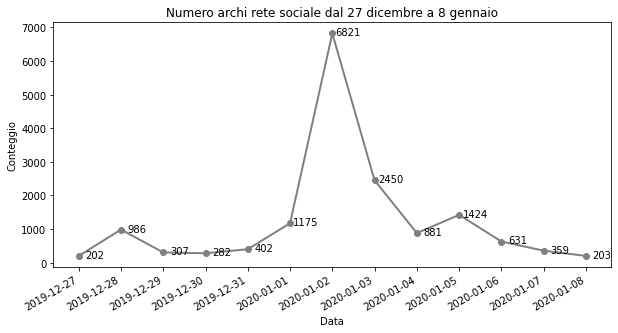

In [5]:
fig =plt.figure(figsize=(10,5))
plt.plot(evoluzione['data'],evoluzione['num_archi'],color='gray',marker='o',linewidth=2)
plt.title('Numero archi rete sociale dal 27 dicembre a 8 gennaio')
plt.xlabel('Data')
plt.ylabel('Conteggio')
plt.gcf().autofmt_xdate()


for i in range(0,len(evoluzione)):

    plt.annotate(evoluzione.iloc[i]['num_archi'], # this is the text
                 (evoluzione.iloc[i]['data'],evoluzione.iloc[i]['num_archi']), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(16,-2), # distance from text to points (x,y)
                 ha='center')

plt.savefig('drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/plot/evoluzione_archi.png')

# COMMUNITY DETECTION

## Rete cumulata totale dal 27 dicembra a 8 gennaio

100%|██████████| 4200/4200 [00:08<00:00, 473.32it/s]


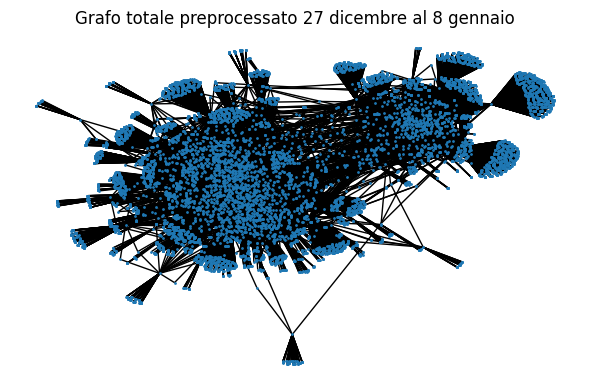

In [6]:
dicts_pre = {}
for i in tqdm(relazioni.retweet_screen_name.unique()):
  if len(relazioni.loc[relazioni.retweet_screen_name == i]["user_screen_name"].unique().tolist()) > 10:
    dicts_pre[i] = relazioni.loc[relazioni.retweet_screen_name == i]["user_screen_name"].unique().tolist()
  else:
    pass
      

plt.figure(dpi=100)
plt.title("Grafo totale preprocessato 27 dicembre al 8 gennaio")
G_pre = nx.Graph(dicts_pre)
pos = nx.spring_layout(G_pre)
d = dict(G_pre.degree)
nx.draw(G_pre, font_size=10,pos=pos,node_size=1)

plt.tight_layout()
plt.savefig(path+"Preprocessed_Totale.png")


In [0]:
def getMetrics(nodo):
  """
    Funzione per restituire, dato un grafo, betweeness e closeness e deg di ogni nodo in formato pandas dataframe.
  """
  clos = nx.closeness_centrality(nodo)
  betw = nx.betweenness_centrality(nodo)
  deg = nx.degree_centrality(nodo)
  #check se l'ordine delle keys di clos,betw,deg è uguale (ma prob. lo è)
  assert len(clos) == len(betw) == len(deg)
  return pd.DataFrame([clos.values(),betw.values(),deg.values()],columns=clos.keys(),index=["Closeness","Betweenees","Degree"]).T

### Greedy modularity

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


20


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

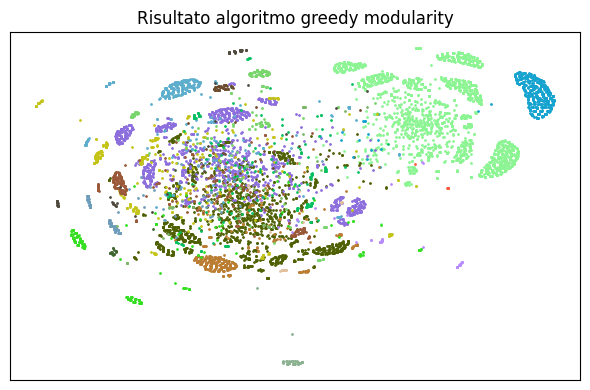

In [8]:
#community 
from networkx.algorithms import community

community_modularity = community.greedy_modularity_communities(G_pre)
print(len(community_modularity))

plt.figure(dpi=100)
plt.title("Risultato algoritmo greedy modularity")
colors = [np.random.rand(3,) for x in range(0,len(community_modularity))]

c=0
for i in community_modularity:
  nx.draw_networkx_nodes(G_pre, pos, nodelist=i, node_color=colors[c],node_size=1)
  plt.savefig(path+"CommunityModularity"+str(c)+".png")
  c=c+1
plt.tight_layout()
plt.savefig(path+"CommunityModularity.png")

In [0]:
#csv con persone appartenenti a ogni comunità
lists = []
for i in range(0,len(community_modularity)):
  for j in community_modularity[i]:
    lists.append((j,i))
pd.DataFrame(lists,columns="Persona Comunità".split(" ")).to_csv("drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/tweet_csv/community_disjoined1.csv")

### Best partition


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

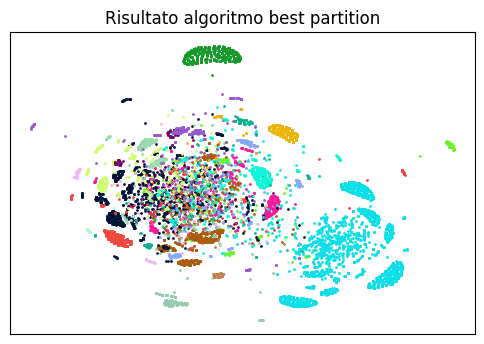

In [9]:
from networkx.algorithms import community
import community
partition = community.best_partition(G_pre)
list_community = []
pos = nx.spring_layout(G_pre)
colors = [np.random.rand(3,) for x in range(0,len(set(partition.values())))]

count = 0
plt.figure(dpi=100)
plt.title("Risultato algoritmo best partition")
for com in set(partition.values()) :
     list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
     list_community.append(list_nodes)
     nx.draw_networkx_nodes(G_pre, pos, list_nodes, node_size = 1,node_color = colors[count])
     plt.savefig(path+"CommunityBestPartition"+str(count)+".png")
     count += 1
plt.savefig(path+"BestCommunity.png")

In [0]:
#csv con persone appartenenti a ogni comunità
lists = []
for i in range(0,len(list_community)):
  for j in list_community[i]:
    lists.append((j,i))
pd.DataFrame(lists,columns="Persona Comunità".split(" ")).to_csv("drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/tweet_csv/communitybest_partition_disjoined.csv")

## Valutazione algoritmi community detection



In [12]:
from networkx.algorithms import community
community.quality.modularity(G_pre,community_modularity)

0.6703320203128103

In [13]:
import community
partition = community.best_partition(G_pre)
community.modularity(partition,G_pre)

0.6630769281305803

## Analisi utenti comunità (algoritmo migliore)

In [0]:
#metriche per ogni community
users_in_community = [x for x in community_modularity]
metriche = []
for n in range(0,len(users_in_community)):
  dicts_community = {}
  for i in users_in_community[n]:
    dicts_community[i] = [ x for x in relazioni.loc[relazioni.retweet_screen_name == i]["user_screen_name"].unique().tolist()]

  G_community = nx.Graph(dicts_community)
  tmp = getMetrics(G_community)

  b = tmp["Betweenees"].sort_values(ascending=False).keys()[0]
  d = tmp["Degree"].sort_values(ascending=False).keys()[0]
  c = tmp["Closeness"].sort_values(ascending=False).keys()[0]
  metriche.append([n,b,d,c])
  
metriche_x_cluster = pd.DataFrame(metriche,columns="Community,Betweeness,Degree,Closeness".split(","))
metriche_x_cluster.head()
metriche_x_cluster.to_csv(path+"MetricheModularity112.csv")

In [4]:
communities = pd.read_csv("drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/tweet_csv/community_disjoined1.csv").drop(columns="Unnamed: 0")
df = pd.read_csv("drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/DatasetPreprocessato0.csv").drop(columns="Unnamed: 0")
communities.columns = ["retweet_screen_name","Comunità"]
df_ = df.merge(communities,on="retweet_screen_name")
df_.head()

,Unnamed: 0.1,id_tweet,time_tweet,retweet_count,user_screen_name,text,retweet_screen_name,type,month,day,textPreprocessed,textPreprocessed1,textPreprocessed2,textPreprocessed3,textPreprocessedLemmatized,Comunità
0,0,1215192852457717760,Thu Jan 09 08:45:27 +0000 2020,2,simplicissimus,"Hey Moris.... ehm, hey @Intuslegens\n\nin Ital...",guffanti_marco,RT_NOQUOTE,Jan,9,"Hey Moris ... . ehm , hey @ Intuslegens in Ita...","Hey Moris ... . ehm , hey @intuslegens in Ital...","['', '...', '.', 'ehm', ',', 'hey', '', 'in', ...",ehm hey in di cialtroni è pieno ma utilizzare ...,ehm hey in di cialtrone essere pieno ma utiliz...,2
1,136,1210995682309476352,Sat Dec 28 18:47:24 +0000 2019,152,Miti_Vigliero,Checco Zalone fa un film in cui mostra una par...,guffanti_marco,RT_NOQUOTE,Dec,28,Checco Zalone fa un film in cui mostra una par...,Checco Zalone fa un film in cui mostra una par...,"['', 'fa', 'un', 'film', 'in', 'cui', 'mostra'...",fa un film in cui mostra una parodia del sovra...,fare un film in cui mostrare una parodiare del...,2
2,231,1211030665115947008,Sat Dec 28 21:06:25 +0000 2019,152,Morphea970,Checco Zalone fa un film in cui mostra una par...,guffanti_marco,RT_NOQUOTE,Dec,28,Checco Zalone fa un film in cui mostra una par...,Checco Zalone fa un film in cui mostra una par...,"['', 'fa', 'un', 'film', 'in', 'cui', 'mostra'...",fa un film in cui mostra una parodia del sovra...,fare un film in cui mostrare una parodiare del...,2
3,417,1211001020853174273,Sat Dec 28 19:08:37 +0000 2019,152,Emanule94671372,Checco Zalone fa un film in cui mostra una par...,guffanti_marco,RT_NOQUOTE,Dec,28,Checco Zalone fa un film in cui mostra una par...,Checco Zalone fa un film in cui mostra una par...,"['', 'fa', 'un', 'film', 'in', 'cui', 'mostra'...",fa un film in cui mostra una parodia del sovra...,fare un film in cui mostrare una parodiare del...,2
4,477,1211035657088450561,Sat Dec 28 21:26:15 +0000 2019,152,chiccaditaranto,Checco Zalone fa un film in cui mostra una par...,guffanti_marco,RT_NOQUOTE,Dec,28,Checco Zalone fa un film in cui mostra una par...,Checco Zalone fa un film in cui mostra una par...,"['', 'fa', 'un', 'film', 'in', 'cui', 'mostra'...",fa un film in cui mostra una parodia del sovra...,fare un film in cui mostrare una parodiare del...,2


### Individuazione rappresentanti comunità
N.B. si è utilizzato il risultato ottenuto dal miglior algoritmo     (greedy modularity)

In [15]:
metriche = pd.read_csv('/content/drive/My Drive/SOCIAL MEDIA ANALYTICS/Progetto/GRAPH_IMAGES/MetricheModularity112.csv')
metriche = metriche.drop(['Betweeness', 'Closeness', 'Unnamed: 0'], axis=1)

metriche

,Community,Degree
0,0,Giorgiolaporta
1,1,Fiorello
2,2,catlatorre
3,3,OizaQueensday
4,4,PBerizzi
5,5,mchiarissima
6,6,fam_cristiana
7,7,KelleddaMurgia
8,8,GliAutogol
9,9,manginobrioches


In [0]:
x=pd.DataFrame(df_["Comunità"].value_counts().sort_index()).reset_index()
x.columns=("Comunità Popolosità".split(" "))

### Analisi tweet contro Matteo Salvini

In [0]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

df_salvini0=df_.loc[df_['Comunità'] == 0]
df_salvini1=df_.loc[df_['Comunità'] == 2]
df_salvini2=df_.loc[df_['Comunità'] == 10]
df_salvini3=df_.loc[df_['Comunità'] == 18]
df_salvini4=df_.loc[df_['Comunità'] == 19]

In [0]:
df_salvini0 = (df_salvini0['textPreprocessed'].value_counts().head(10))
df_salvini1 = (df_salvini1['textPreprocessed'].value_counts().head(10))
df_salvini2 = (df_salvini2['textPreprocessed'].value_counts().head(10))
df_salvini3 = (df_salvini3['textPreprocessed'].value_counts().head(10))
df_salvini4 = (df_salvini4['textPreprocessed'].value_counts().head(10))

In [22]:
pd.DataFrame(df_salvini0)

,textPreprocessed
"Mentre l'Italia dibatte sugli alti e nobili valori del film # ToloTolo , voglio ricordare che se in # Senato è stato eletto il primo senatore nero , lo si deve alla @ LegaSalvini . Così , giusto per ricordare la differenza su chi commenta un film e chi elegge Toni Iwobi . # 2gennaio",751
"La bugia stupida della cicogna che ci fa nascere per caso in vari posti del mondo . Ognuno di noi invece è nato in un determinato luogo e appartiene ad un determinato popolo , per infinite SCELTE precise fatte dai suoi genitori , dai suoi nonni e da tutti i suoi avi . # ToloTolo",492
"Contrordine , compagni ! Due settimane fa , # CheccoZalone è stato criminalizzato a sinistra per il teaser del suo film ( accusato di essere pro # Salvini ) . Adesso , è stato “ riabilitato ” dai recensori ufficiali “ de sinistra ” in quanto moderatamente anti # Salvini . Siete ri-di-co-li .",484
"Gli italiani sono razzisti , incapaci , fascisti e ignoranti , i loro problemi non contano un cazzo perché in Africa stanno peggio e comunque i neri sono più belli , prestanti e intelligenti di noi , quindi PORTI APERTI ! Ecco il messaggio del film # ToloTolo È merda pura .",368
# ToloTolo è piaciuto a Letta e alla Murgia . Penso non occorra aggiungere altro .,252
"Contrordine compagni ! Dopo aver massacrato # ToloTolo di # CheccoZalone per la canzoncina-teaser , la sinistra e i suoi intellò di riferimento pare abbiano riabilitato il film ( peraltro non ancora uscito in sala ) . @ Capezzone ci racconta il",199
Ho appena visto la prima di TOLO TOLO : zero applausi alla fine . Oltretutto anche scarso e noioso . Servirebbe `` soddisfatti o rimborsati '' . # ToloTolo # Cinema,160
"Davvero qualcuno pensava che # Zalone si andasse a schiantare contro la marea radical ? Strategia commerciale geniale : un trailer musicale che attira le ire della sinistra , e un film al 99 % politicamente corretto con fa incazzare la destra : una presa per il culo totale . # ToloTolo",102
"CONSIDERAZIONI SU # TOLOTOLO Ho appena finito di vedere il nuovo film di Checco Zalone . Pura propaganda globalista , buonista ed immigrazionista . Caro Checco Zalone , mi spiace ma hai lasciato che un tuo film venisse inquinato . Peccato . Voto 0 . # globalismo",87
Non serviva un genio per capire che la polemica sul razzismo di # ToloTolo fosse montata ad arte ... Se Checco si unisce ad un gruppo di # migranti per tornare in Italia è logico pensare che il film sia l'ennesima opera buonista per farci empatizzare con loro,83
